In [1]:
import pandas as pd
import numpy as np
from math import *
from random import *
import datetime as datetime
import matplotlib.pyplot as plt
import math
from numpy import unravel_index
from PointProcess import PointProcessTrain

In [2]:
fields = ['XCOORD', 'YCOORD', 'CALL_TYPE_FINAL_D', 'CALL_TYPE_FINAL', 'DATE_TIME']
full_data = pd.read_csv('FixedLatLongTimeLoc_AndTimeSorted.csv', usecols=fields)

full_data['DATE_TIME'] =  pd.to_datetime(full_data['DATE_TIME'], format='%Y-%m-%d %H:%M:%S')
full_data = full_data.sort_values(by='DATE_TIME')
full_data.head()

,CALL_TYPE_FINAL,CALL_TYPE_FINAL_D,YCOORD,XCOORD,DATE_TIME
0,773A,UNCONSCIOUS PERS,39.824332,-86.236119,2006-12-28 04:45:48
1,774A,ASSAULT/TRAUMA,39.781627,-86.120826,2006-12-28 04:48:53
2,768A,SEIZURE,39.756840,-85.998714,2006-12-28 04:52:19
3,773A,UNCONSCIOUS PERS,39.782064,-86.044592,2006-12-28 05:10:57
4,790A,*MEDICAL ALARM,39.742415,-86.111559,2006-12-28 05:17:56


In [2]:
Event_Type_Lookup = {}
for i in range(0, len(full_data)):
    key = full_data.CALL_TYPE_FINAL[i]
    val = full_data.CALL_TYPE_FINAL_D[i]
    Event_Type_Lookup.setdefault(key, [])
    if val not in Event_Type_Lookup[key]:
        Event_Type_Lookup[key].append(val)

NameError: name 'full_data' is not defined

In [12]:
data = full_data[300000:302000]
data.reset_index(drop=True, inplace=True)
all_events = PointProcessTrain(data, xgridsize = 75, ygridsize = 75, w = [1,.1, .05])

In [13]:
all_events.train()

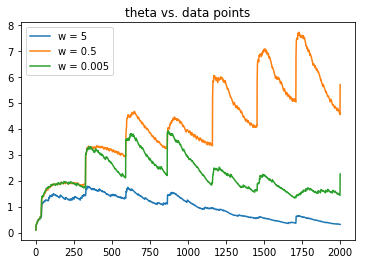


Hour vector: 
[5.00002496e-02 2.93703279e-07 6.61515251e-07 5.52860346e-07
 7.52096310e-07 6.46566195e-07 1.25613746e-06 4.98146308e-06
 5.70437067e-06 6.66431397e-06 1.87917914e-05 7.31618099e-05
 8.64564666e-05 1.51998110e-04 2.06802455e-04 7.78356307e-04
 1.54963704e-03 4.38156623e-03 6.89101997e-03 2.14880755e-02
 4.12970696e-02 8.08342941e-02 2.00706788e-01 5.91514220e-01]
Day vector: 
[4.94328043e-26 2.04223038e-19 6.87208241e-13 3.29282183e-07
 9.49999671e-01 5.00000000e-02 4.09788042e-32]


In [14]:
all_events.param_examine()

In [16]:
all_events.top_events_all_averaged(num_points= 800, num_top_grids = 20)

9277.7332430614 (27, 41) 23.874393840341668 (0, 0)
19.0 (27, 41)
Time period is 2.8351220914 days

Top model hotspots in real top 10:
Grid: (27, 41), Model: 32.87938309439943, Real: 19
Grid: (27, 31), Model: 25.489065868853984, Real: 17
Grid: (26, 31), Model: 21.72448222453959, Real: 16
Grid: (26, 32), Model: 12.671639847865746, Real: 11
Grid: (25, 31), Model: 10.737368482948412, Real: 11
Grid: (26, 41), Model: 10.381435347867471, Real: 6
Grid: (26, 34), Model: 9.759328384403185, Real: 6
Grid: (26, 33), Model: 9.462571542478527, Real: 5
Grid: (31, 33), Model: 9.135139424060744, Real: 8
Grid: (29, 32), Model: 8.606882358859016, Real: 6
Grid: (26, 28), Model: 8.517562848030861, Real: 6
Grid: (35, 43), Model: 8.39479270530625, Real: 7
Grid: (26, 27), Model: 7.609067303474446, Real: 6
Grid: (34, 34), Model: 6.765362976664793, Real: 5

Top model hotstpots not in real top 10
Grid: (28, 28), Model: 7.32261948787839, Real: 4
Grid: (26, 35), Model: 7.088519402721137, Real: 4
Grid: (21, 37), Mod